In [1]:
from pymongo import MongoClient
#pymongo에 있는 mongoclient라는 클래스만 가져옴

In [2]:
client = MongoClient(

    host = 'localhost',
    port = 27017
    
)
#client라는 변수를 사용해서 mongodb에 접속할 수 있는 mongoclient 클래스 생성

In [3]:
client.list_database_names()
#클래스에 있는 함수 method를 불러오기 위해 client.~

['admin', 'config', 'local', 'ubion']

In [10]:
db = client["ubion"] 
list(db["test"].find())
#sql; SELECT * FROM test 

[{'_id': ObjectId('62328e7fddd256c50fce1f09'),
  'name': 'test',
  'phone': '01012345678'},
 {'_id': ObjectId('6232905cddd256c50fce1f0b'), 'loc': 'Seoul'},
 {'_id': ObjectId('6232905cddd256c50fce1f0c'), 'gender': 'male'},
 {'_id': ObjectId('6232905cddd256c50fce1f0d'), 'age': 20.0, 'hobby': 'soccer'},
 {'_id': ObjectId('6232919fddd256c50fce1f0e'), 'name': 'test2', 'age': 30.0},
 {'_id': ObjectId('62329d9fbdc6f3b8488536ba'), '1': '1', '2': '7', '3': '3'},
 {'_id': ObjectId('62329db0bdc6f3b8488536bb'), '뽀로로': 'm'},
 {'_id': ObjectId('62329db0bdc6f3b8488536bc'), '크롱': 'm'},
 {'_id': ObjectId('62329db0bdc6f3b8488536bd'), '루피': 'w'},
 {'_id': ObjectId('62329db0bdc6f3b8488536be'), '에디': 'm'},
 {'_id': ObjectId('62329db0bdc6f3b8488536bf'), '포비': 'm'},
 {'_id': ObjectId('6233ce745634cc8235cdaf4a'), '1': '1', '2': '7', '3': '3'},
 {'_id': ObjectId('6233ce745634cc8235cdaf4b'), '뽀로로': 'm'},
 {'_id': ObjectId('6233ce745634cc8235cdaf4c'), '크롱': 'm'},
 {'_id': ObjectId('6233ce745634cc8235cdaf4d'), '루

In [5]:
data = {
    "1" : "1",
    "2" : "7",
    "3" : "3"
}
db.test.insert_one(data)
#sql; INSERT INTO test VALUE (VALUES 안됨! 하나만 뽑는거임 이거는)

In [6]:
###data변수 만들어서 insert_many 사용해보기

In [11]:
data_2 = [
    {"뽀로로" : "m"},
    {"크롱" : "m"},
    {"루피" : "w"},
    {"에디" : "m"},
    {"포비" : "m"}
]
db.test.insert_many(data_2)

In [12]:
import pandas as pd


In [14]:
sql = """
     SELECT * FROM emp   
    """
result = _db.executeAll(sql)
pd.DataFrame(result).to_csv("emp.csv")


TypeError: 'Collection' object is not callable. If you meant to call the 'executeAll' method on a 'Database' object it is failing because no such method exists.

In [ ]:
db.emp.find_one()

{'_id': ObjectId('6232b730b0fe2ce985b6d3a7'),
 '': '0',
 'EMPNO': '7369',
 'ENAME': 'SMITH',
 'JOB': 'CLERK',
 'MGR': '7902',
 'HIREDATE': '1980-12-17',
 'SAL': '800.00',
 'DEPTNO': '20'}

In [ ]:
list(db.emp.find(
    {
        "ENAME" : "SMITH"
    }
))
#SELECT * FROM emp WHERE ENAME = "SMITH"

[{'_id': ObjectId('6232b730b0fe2ce985b6d3a7'),
  '': '0',
  'EMPNO': '7369',
  'ENAME': 'SMITH',
  'JOB': 'CLERK',
  'MGR': '7902',
  'HIREDATE': '1980-12-17',
  'SAL': '800.00',
  'DEPTNO': '20'}]

In [ ]:
#emp collection; key값=EMPNO, ENAME, DEPTNO 추출
list(db.emp.find(
    {},              #WHERE절-where 조건문 쓸 때 사용하는 공간
    {"EMPNO": 1,     #COLUMN절-key값을 선택할 수 있는 공간
     "ENAME": 1,
    "DEPTNO": 1}     
))
#sql-SELECT문
#SELECT EMPNO, ENAME, DEPTNO FROM emp

[{'_id': ObjectId('6232b730b0fe2ce985b6d3a7'),
  'EMPNO': '7369',
  'ENAME': 'SMITH',
  'DEPTNO': '20'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3a8'),
  'EMPNO': '7499',
  'ENAME': 'ALLEN',
  'DEPTNO': '30'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3a9'),
  'EMPNO': '7521',
  'ENAME': 'WARD',
  'DEPTNO': '30'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3aa'),
  'EMPNO': '7566',
  'ENAME': 'JONES',
  'DEPTNO': '20'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3ab'),
  'EMPNO': '7654',
  'ENAME': 'MARTIN',
  'DEPTNO': '30'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3ac'),
  'EMPNO': '7698',
  'ENAME': 'BLAKE',
  'DEPTNO': '30'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3ad'),
  'EMPNO': '7782',
  'ENAME': 'CLARK',
  'DEPTNO': '10'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3ae'),
  'EMPNO': '7788',
  'ENAME': 'SCOTT',
  'DEPTNO': '20'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3af'),
  'EMPNO': '7839',
  'ENAME': 'KING',
  'DEPTNO': '10'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3b0'),
  'EMPNO'

In [ ]:
list(db.emp.find().sort("ENAME"))

#SELECT * FROM emp ORDER By ENAME

[{'_id': ObjectId('6232b730b0fe2ce985b6d3b1'),
  '': '10',
  'EMPNO': '7876',
  'ENAME': 'ADAMS',
  'JOB': 'CLERK',
  'MGR': '7788',
  'HIREDATE': '1987-07-13',
  'SAL': '1100.00',
  'DEPTNO': '20'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3a8'),
  '': '1',
  'EMPNO': '7499',
  'ENAME': 'ALLEN',
  'JOB': 'SALESMAN',
  'MGR': '7698',
  'HIREDATE': '1981-02-20',
  'SAL': '1600.00',
  'COMM': '300.00',
  'DEPTNO': '30'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3ac'),
  '': '5',
  'EMPNO': '7698',
  'ENAME': 'BLAKE',
  'JOB': 'MANAGER',
  'MGR': '7839',
  'HIREDATE': '1981-05-01',
  'SAL': '2850.00',
  'DEPTNO': '30'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3ad'),
  '': '6',
  'EMPNO': '7782',
  'ENAME': 'CLARK',
  'JOB': 'MANAGER',
  'MGR': '7839',
  'HIREDATE': '1981-06-09',
  'SAL': '2450.00',
  'DEPTNO': '10'},
 {'_id': ObjectId('6232b730b0fe2ce985b6d3b3'),
  '': '12',
  'EMPNO': '7902',
  'ENAME': 'FORD',
  'JOB': 'ANALYST',
  'MGR': '7566',
  'HIREDATE': '1981-12-03',
  'SAL': '3000

In [ ]:
#급여가 2000보다 큰 데이터만 출력
result = db.emp.find({"SAL": {"$gt":2000}})
for list in result:
    print(list)

#SELECT * FROM emp WHERE SAL > 2000

{'_id': ObjectId('6232c69bb0fe2ce985b6d3b8'), '': '3', 'EMPNO': 7566, 'ENAME': 'JONES', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-04-02', 'SAL': 2975.0, 'DEPTNO': 20}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3ba'), '': '5', 'EMPNO': 7698, 'ENAME': 'BLAKE', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-05-01', 'SAL': 2850.0, 'DEPTNO': 30}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bb'), '': '6', 'EMPNO': 7782, 'ENAME': 'CLARK', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-06-09', 'SAL': 2450.0, 'DEPTNO': 10}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bc'), '': '7', 'EMPNO': 7788, 'ENAME': 'SCOTT', 'JOB': 'ANALYST', 'MGR': 7566, 'HIREDATE': '1987-06-28', 'SAL': 3000.0, 'DEPTNO': 20}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bd'), '': '8', 'EMPNO': 7839, 'ENAME': 'KING', 'JOB': 'PRESIDENT', 'HIREDATE': '1981-11-17', 'SAL': 5000.0, 'DEPTNO': 10}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3c1'), '': '12', 'EMPNO': 7902, 'ENAME': 'FORD', 'JOB': 'ANALYST', 'MGR': 7566, 'HIREDATE': '1981-12-03

In [ ]:
#급여가 2450보다 크거나 같은 데이터만 출력
result = db.emp.find({"SAL": {"$gte":2450}})
for list in result:
    print(list)


{'_id': ObjectId('6232c69bb0fe2ce985b6d3b8'), '': '3', 'EMPNO': 7566, 'ENAME': 'JONES', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-04-02', 'SAL': 2975.0, 'DEPTNO': 20}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3ba'), '': '5', 'EMPNO': 7698, 'ENAME': 'BLAKE', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-05-01', 'SAL': 2850.0, 'DEPTNO': 30}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bb'), '': '6', 'EMPNO': 7782, 'ENAME': 'CLARK', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-06-09', 'SAL': 2450.0, 'DEPTNO': 10}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bc'), '': '7', 'EMPNO': 7788, 'ENAME': 'SCOTT', 'JOB': 'ANALYST', 'MGR': 7566, 'HIREDATE': '1987-06-28', 'SAL': 3000.0, 'DEPTNO': 20}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bd'), '': '8', 'EMPNO': 7839, 'ENAME': 'KING', 'JOB': 'PRESIDENT', 'HIREDATE': '1981-11-17', 'SAL': 5000.0, 'DEPTNO': 10}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3c1'), '': '12', 'EMPNO': 7902, 'ENAME': 'FORD', 'JOB': 'ANALYST', 'MGR': 7566, 'HIREDATE': '1981-12-03

In [ ]:
#급여가 2450보다 작은 데이터만 출력
result = db.emp.find({"SAL": {"$lt":2450}})
for list in result:
    print(list)


{'_id': ObjectId('6232c69bb0fe2ce985b6d3b5'), '': '0', 'EMPNO': 7369, 'ENAME': 'SMITH', 'JOB': 'CLERK', 'MGR': 7902, 'HIREDATE': '1980-12-17', 'SAL': 800.0, 'DEPTNO': 20}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b6'), '': '1', 'EMPNO': 7499, 'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'MGR': 7698, 'HIREDATE': '1981-02-20', 'SAL': 1600.0, 'COMM': 300.0, 'DEPTNO': 30}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b7'), '': '2', 'EMPNO': 7521, 'ENAME': 'WARD', 'JOB': 'SALESMAN', 'MGR': 7698, 'HIREDATE': '1981-02-22', 'SAL': 1250.0, 'COMM': 500.0, 'DEPTNO': 30}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b9'), '': '4', 'EMPNO': 7654, 'ENAME': 'MARTIN', 'JOB': 'SALESMAN', 'MGR': 7698, 'HIREDATE': '1981-09-28', 'SAL': 1250.0, 'COMM': 1400.0, 'DEPTNO': 30}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3be'), '': '9', 'EMPNO': 7844, 'ENAME': 'TURNER', 'JOB': 'SALESMAN', 'MGR': 7698, 'HIREDATE': '1981-09-08', 'SAL': 1500.0, 'COMM': 0.0, 'DEPTNO': 30}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3bf'), '': '10', 'EMPNO': 7876

In [ ]:
# SELECT * FROM emp WHERE ENAME = SMITH and JOB = CLERK
result = db.emp.find(
    {
        "ENAME" : "SMITH",
        "JOB" : "CLERK"
    }
)
for list in result:
    print(list)

{'_id': ObjectId('6232b730b0fe2ce985b6d3a7'), '': '0', 'EMPNO': '7369', 'ENAME': 'SMITH', 'JOB': 'CLERK', 'MGR': '7902', 'HIREDATE': '1980-12-17', 'SAL': '800.00', 'DEPTNO': '20'}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b5'), '': '0', 'EMPNO': 7369, 'ENAME': 'SMITH', 'JOB': 'CLERK', 'MGR': 7902, 'HIREDATE': '1980-12-17', 'SAL': 800.0, 'DEPTNO': 20}


In [ ]:
# SELECT * FROM emp WHERE ENAME = SMITH or ENAME = ALEN
result = db.emp.find(
    {
        "$or" : [
            {
                "ENAME" : "SMITH"
            },
            {
                "ENAME" : "ALLEN"
                }
        ]
    }
)
for list in result:
    print(list)

{'_id': ObjectId('6232b730b0fe2ce985b6d3a7'), '': '0', 'EMPNO': '7369', 'ENAME': 'SMITH', 'JOB': 'CLERK', 'MGR': '7902', 'HIREDATE': '1980-12-17', 'SAL': '800.00', 'DEPTNO': '20'}
{'_id': ObjectId('6232b730b0fe2ce985b6d3a8'), '': '1', 'EMPNO': '7499', 'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'MGR': '7698', 'HIREDATE': '1981-02-20', 'SAL': '1600.00', 'COMM': '300.00', 'DEPTNO': '30'}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b5'), '': '0', 'EMPNO': 7369, 'ENAME': 'SMITH', 'JOB': 'CLERK', 'MGR': 7902, 'HIREDATE': '1980-12-17', 'SAL': 800.0, 'DEPTNO': 20}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b6'), '': '1', 'EMPNO': 7499, 'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'MGR': 7698, 'HIREDATE': '1981-02-20', 'SAL': 1600.0, 'COMM': 300.0, 'DEPTNO': 30}


In [ ]:
#SELECT * FROM emp WHERE SAL >=2000 AND SAL < 4000
#_id 없애기
result = db.emp.find(
        {
            "SAL": {
                "$gte":2000,
                "$lt":4000
                }
            },
            {
                "_id":0
            }
)
for list in result:
    print(list)

{'': '3', 'EMPNO': 7566, 'ENAME': 'JONES', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-04-02', 'SAL': 2975.0, 'DEPTNO': 20}
{'': '5', 'EMPNO': 7698, 'ENAME': 'BLAKE', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-05-01', 'SAL': 2850.0, 'DEPTNO': 30}
{'': '6', 'EMPNO': 7782, 'ENAME': 'CLARK', 'JOB': 'MANAGER', 'MGR': 7839, 'HIREDATE': '1981-06-09', 'SAL': 2450.0, 'DEPTNO': 10}
{'': '7', 'EMPNO': 7788, 'ENAME': 'SCOTT', 'JOB': 'ANALYST', 'MGR': 7566, 'HIREDATE': '1987-06-28', 'SAL': 3000.0, 'DEPTNO': 20}
{'': '12', 'EMPNO': 7902, 'ENAME': 'FORD', 'JOB': 'ANALYST', 'MGR': 7566, 'HIREDATE': '1981-12-03', 'SAL': 3000.0, 'DEPTNO': 20}


In [ ]:
#SELECT * FROM emp WHERE ENAME LIKE %S%
result = db.emp.find(
    {
        "ENAME" : {
            "$regex" : "S" #S로 시작하는거 = "^S" , S로 끝나는거 = "S$"
        }

    }
) 
pd.DataFrame(result)

,_id,,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,DEPTNO
0,6232b730b0fe2ce985b6d3a7,0,7369,SMITH,CLERK,7902,1980-12-17,880,20
1,6232b730b0fe2ce985b6d3aa,3,7566,JONES,MANAGER,7839,1981-04-02,2975.00,20
2,6232b730b0fe2ce985b6d3ae,7,7788,SCOTT,ANALYST,7566,1987-06-28,3000.00,20
3,6232b730b0fe2ce985b6d3b1,10,7876,ADAMS,CLERK,7788,1987-07-13,1100.00,20
4,6232b730b0fe2ce985b6d3b2,11,7900,JAMES,CLERK,7698,1981-12-03,950.00,30
5,6232c69bb0fe2ce985b6d3b5,0,7369,SMITH,CLERK,7902,1980-12-17,800.0,20
6,6232c69bb0fe2ce985b6d3b8,3,7566,JONES,MANAGER,7839,1981-04-02,2975.0,20
7,6232c69bb0fe2ce985b6d3bc,7,7788,SCOTT,ANALYST,7566,1987-06-28,3000.0,20
8,6232c69bb0fe2ce985b6d3bf,10,7876,ADAMS,CLERK,7788,1987-07-13,1100.0,20
9,6232c69bb0fe2ce985b6d3c0,11,7900,JAMES,CLERK,7698,1981-12-03,950.0,30


In [ ]:
#SELECT ENAME, JOB, SAL, DEPTNO FROM emp 
#WHERE SAl: > 1250 AND SAL<=3000 AND JOB=SALESMAN
#ORDER BY ENAME

result = db.emp.find(
    {"SAL": {"$gt":1250, "$lte":3000}, "JOB" : "SALESMAN"}, 
             
    {"ENAME": 1, "JOB": 1, "SAL": 1, "DEPTNO": 1, "_id": 0}).sort("ENAME", -1) #-1은 오름차순, 1은 내림차순
# "ENAME" : 1 ->ENAME을 보여주겠다, "_id":0->_id를 숨기겠다!
for list in result:
    print(list)


{'ENAME': 'TURNER', 'JOB': 'SALESMAN', 'SAL': 1500.0, 'DEPTNO': 30}
{'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'SAL': 1600.0, 'DEPTNO': 30}


In [ ]:
result = db.emp.find()
for list in result:
    print(list)


{'_id': ObjectId('6232b730b0fe2ce985b6d3a7'), '': '0', 'EMPNO': '7369', 'ENAME': 'SMITH', 'JOB': 'CLERK', 'MGR': '7902', 'HIREDATE': '1980-12-17', 'SAL': 880, 'DEPTNO': '20'}
{'_id': ObjectId('6232b730b0fe2ce985b6d3a8'), '': '1', 'EMPNO': '7499', 'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'MGR': '7698', 'HIREDATE': '1981-02-20', 'SAL': '1600.00', 'COMM': '300.00', 'DEPTNO': '30'}
{'_id': ObjectId('6232b730b0fe2ce985b6d3a9'), '': '2', 'EMPNO': '7521', 'ENAME': 'WARD', 'JOB': 'SALESMAN', 'MGR': '7698', 'HIREDATE': '1981-02-22', 'SAL': '1250.00', 'COMM': '500.00', 'DEPTNO': '30'}
{'_id': ObjectId('6232b730b0fe2ce985b6d3aa'), '': '3', 'EMPNO': '7566', 'ENAME': 'JONES', 'JOB': 'MANAGER', 'MGR': '7839', 'HIREDATE': '1981-04-02', 'SAL': '2975.00', 'DEPTNO': '20'}
{'_id': ObjectId('6232b730b0fe2ce985b6d3ab'), '': '4', 'EMPNO': '7654', 'ENAME': 'MARTIN', 'JOB': 'SALESMAN', 'MGR': '7698', 'HIREDATE': '1981-09-28', 'SAL': '1250.00', 'COMM': '1400.00', 'DEPTNO': '30'}
{'_id': ObjectId('6232b730b0fe2ce98

In [ ]:
db.emp.update_one(
    {
        "ENAME" : "SMITH"
    },
    {
        "$set" : {
            "SAL" : 880
        }
    }
)



In [ ]:
result = db.emp.find(
    {
        "ENAME" : "SMITH"
    }
)
pd.DataFrame(result)


,_id,,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,DEPTNO
0,6232b730b0fe2ce985b6d3a7,0,7369,SMITH,CLERK,7902,1980-12-17,880.0,20
1,6232c69bb0fe2ce985b6d3b5,0,7369,SMITH,CLERK,7902,1980-12-17,800.0,20


In [ ]:
db.emp.update_many(
    {
        "ENAME" : "ALLEN"
    },
    {
        "$set" : {
            "SAL" : 2000
        }
    }
)

In [ ]:
result = db.emp.find(
    {
        "ENAME":"ALLEN"
    }
)
for list in result:
    print(list)

{'_id': ObjectId('6232b730b0fe2ce985b6d3a8'), '': '1', 'EMPNO': '7499', 'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'MGR': '7698', 'HIREDATE': '1981-02-20', 'SAL': 2000, 'COMM': '300.00', 'DEPTNO': '30'}
{'_id': ObjectId('6232c69bb0fe2ce985b6d3b6'), '': '1', 'EMPNO': 7499, 'ENAME': 'ALLEN', 'JOB': 'SALESMAN', 'MGR': 7698, 'HIREDATE': '1981-02-20', 'SAL': 2000, 'COMM': 300.0, 'DEPTNO': 30}


In [ ]:
db.emp.delete_one(
    {
        "JOB" : "PRESIDENT"
    }
)
pd.DataFrame(result)

""


In [ ]:
db.emp.find(
    {
        "JOB" : "PRESIDENT"
    }
)


In [ ]:
db.emp.delete_many(
    {
        "ENAME" : "MILLER"
    }
)

In [ ]:
result = db.emp.find(
    {
        "ENAME":"MILLER"
    }
)

pd.DataFrame(result)
#데이터 없음. 위에서 해고시켰자나

""


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([10,20,30,40,50,60,70,80,90])
x

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
X_ = np.array(x[0:9:3])
X_

array([10, 40, 70])

<function matplotlib.pyplot.show(close=None, block=None)>

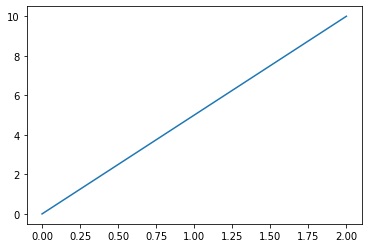

In [ ]:
x = np.linspace(0, 10, 3) #시작과 종료값 무조건 포함, 3개로 나눔
plt.plot(x)
plt.show

In [ ]:
np.logspace(2, 5, 3) #log2 ~ log5 까지 3등분 (100~100000까지)

array([   100.        ,   3162.27766017, 100000.        ])

<function matplotlib.pyplot.show(close=None, block=None)>

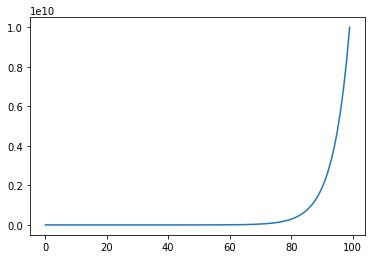

In [ ]:
x = np.logspace(2, 10, 100)
plt.plot(x)
plt.show

In [ ]:
np.random.seed(1)
result = np.random.randint(10, 100, 10)
np.random.seed(2)
result_1 = np.random.randint(10, 100, 10)
np.random.seed(2)
result_2 = np.random.randint(10, 100, 10)

result, result_1, result_2


(array([47, 22, 82, 19, 85, 15, 89, 74, 26, 11]),
 array([50, 25, 82, 32, 53, 92, 85, 17, 44, 59]),
 array([50, 25, 82, 32, 53, 92, 85, 17, 44, 59]))

In [ ]:
np.random.rand(10)
# 0과 1 사이에 균일한 확률분포로 10개 출력

array([0.85397529, 0.49423684, 0.84656149, 0.07964548, 0.50524609,
       0.0652865 , 0.42812233, 0.09653092, 0.12715997, 0.59674531])

In [ ]:
np.random.randn(10)
#표준편차가 1인 가우시안 표준정규분포

array([ 3.70444537e-01,  1.35963386e+00,  5.01857207e-01, -8.44213704e-01,
        9.76147160e-06,  5.42352572e-01, -3.13508197e-01,  7.71011738e-01,
       -1.86809065e+00,  1.73118467e+00])

In [ ]:
np.random.randint(1, 100, 10)
#1부터 99까지 숫자 랜덤하게 10개 출력

array([ 2, 69, 41, 82, 62, 71, 98, 19, 85, 91])

In [ ]:
r = np.random.randint(1, 100, (3,5))
r

array([[50, 28,  1, 63, 41],
       [59, 93, 37, 64, 76],
       [51, 74,  8, 50, 83]])

In [ ]:
#행렬에서 행 섞기(행 순서 바꾸기, 열은 그대로)
np.random.shuffle(r)
r

array([[59, 93, 37, 64, 76],
       [51, 74,  8, 50, 83],
       [50, 28,  1, 63, 41]])

In [ ]:
a = [1, 9, 25, 49]
a_sqrt = np.sqrt(a)
a_sqrt
#제곱근 계산

array([1., 3., 5., 7.])

In [ ]:
a = [1,3,5,7]
a_sq = np.square(a)
a_sq

array([ 1,  9, 25, 49])

In [ ]:
np.exp(0)#e의 0제곱

1.0

In [ ]:
np.exp(4)#e의 4제곱

54.598150033144236

In [ ]:
x = np.linspace(-5, 5, 101) #100개출력
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [ ]:
y = (1 / np.sqrt(2*np.pi)) * np.exp(-x**2/2)
y

array([1.48671951e-06, 2.43896075e-06, 3.96129909e-06, 6.36982518e-06,
       1.01408521e-05, 1.59837411e-05, 2.49424713e-05, 3.85351967e-05,
       5.89430678e-05, 8.92616572e-05, 1.33830226e-04, 1.98655471e-04,
       2.91946926e-04, 4.24780271e-04, 6.11901930e-04, 8.72682695e-04,
       1.23221917e-03, 1.72256894e-03, 2.38408820e-03, 3.26681906e-03,
       4.43184841e-03, 5.95253242e-03, 7.91545158e-03, 1.04209348e-02,
       1.35829692e-02, 1.75283005e-02, 2.23945303e-02, 2.83270377e-02,
       3.54745928e-02, 4.39835960e-02, 5.39909665e-02, 6.56158148e-02,
       7.89501583e-02, 9.40490774e-02, 1.10920835e-01, 1.29517596e-01,
       1.49727466e-01, 1.71368592e-01, 1.94186055e-01, 2.17852177e-01,
       2.41970725e-01, 2.66085250e-01, 2.89691553e-01, 3.12253933e-01,
       3.33224603e-01, 3.52065327e-01, 3.68270140e-01, 3.81387815e-01,
       3.91042694e-01, 3.96952547e-01, 3.98942280e-01, 3.96952547e-01,
       3.91042694e-01, 3.81387815e-01, 3.68270140e-01, 3.52065327e-01,
      

<function matplotlib.pyplot.show(close=None, block=None)>

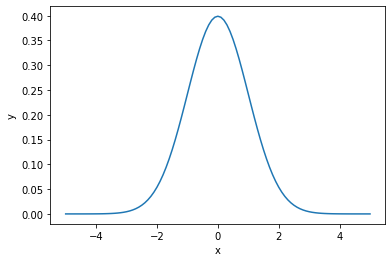

In [ ]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show

In [ ]:
import scipy.stats as stats

In [ ]:
y_ = stats.norm(0,1).pdf(x)
y_

array([1.48671951e-06, 2.43896075e-06, 3.96129909e-06, 6.36982518e-06,
       1.01408521e-05, 1.59837411e-05, 2.49424713e-05, 3.85351967e-05,
       5.89430678e-05, 8.92616572e-05, 1.33830226e-04, 1.98655471e-04,
       2.91946926e-04, 4.24780271e-04, 6.11901930e-04, 8.72682695e-04,
       1.23221917e-03, 1.72256894e-03, 2.38408820e-03, 3.26681906e-03,
       4.43184841e-03, 5.95253242e-03, 7.91545158e-03, 1.04209348e-02,
       1.35829692e-02, 1.75283005e-02, 2.23945303e-02, 2.83270377e-02,
       3.54745928e-02, 4.39835960e-02, 5.39909665e-02, 6.56158148e-02,
       7.89501583e-02, 9.40490774e-02, 1.10920835e-01, 1.29517596e-01,
       1.49727466e-01, 1.71368592e-01, 1.94186055e-01, 2.17852177e-01,
       2.41970725e-01, 2.66085250e-01, 2.89691553e-01, 3.12253933e-01,
       3.33224603e-01, 3.52065327e-01, 3.68270140e-01, 3.81387815e-01,
       3.91042694e-01, 3.96952547e-01, 3.98942280e-01, 3.96952547e-01,
       3.91042694e-01, 3.81387815e-01, 3.68270140e-01, 3.52065327e-01,
      

<function matplotlib.pyplot.show(close=None, block=None)>

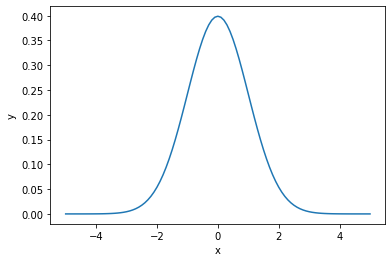

In [ ]:
plt.plot(x, y_)
plt.xlabel('x')
plt.ylabel('y')
plt.show

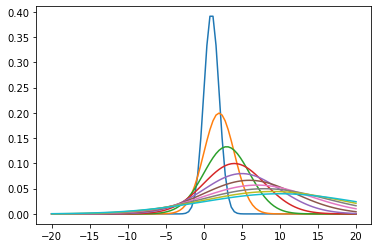

In [ ]:
def norm(_a, _b, _x):
    return stats.norm(_a, _b).pdf(_x)

x = np.linspace(-20, 20, 101)
for i in range(1, 11, 1):
    _y = norm(i, i, x)
    plt.plot(x, _y)
plt.show()

In [ ]:
x = np.random.randint(0,10,10)
x

array([3, 0, 4, 9, 0, 2, 0, 9, 4, 7])

(array([3., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5,
        7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 30 artists>)

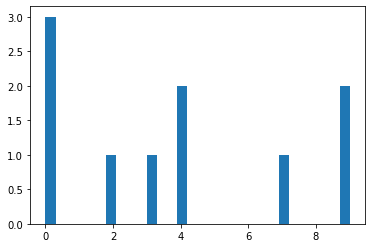

In [ ]:
plt.hist(x, bins=30)#주황색


(array([ 3.,  3.,  4.,  5.,  7.,  7.,  7.,  8.,  8., 10.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

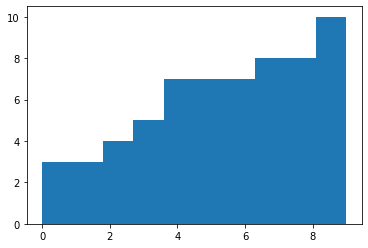

In [ ]:
plt.hist(x, cumulative=True)
#누적분포 히스토그램

(array([0.33333333, 0.        , 0.11111111, 0.11111111, 0.22222222,
        0.        , 0.        , 0.11111111, 0.        , 0.22222222]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

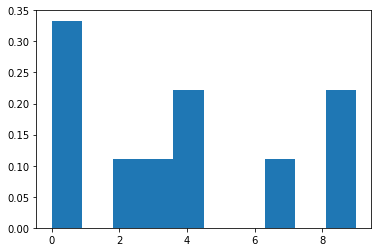

In [ ]:
plt.hist(x, density=True)

In [ ]:
x = np.random.randint(10,50,5)
labels = ["A", "B", "C", "D", "E"]


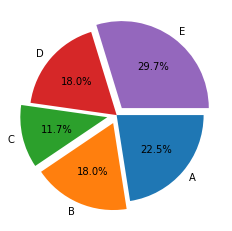

In [ ]:
explodes = [0, 0.10, 0.11, 0, 0.10]#중심점에서 떨여져서 출력
plt.pie(x, autopct='%.1f%%', labels=labels, counterclock = False,
explode=explodes)
#소수점 첫째자리까지 % 출력, 반시계방향
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1,10,10)
y = np.random.rand(10)
x, y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([0.60710689, 0.59245051, 0.5811267 , 0.69221456, 0.28630194,
        0.83021967, 0.74422556, 0.7919291 , 0.53768271, 0.88340901]))

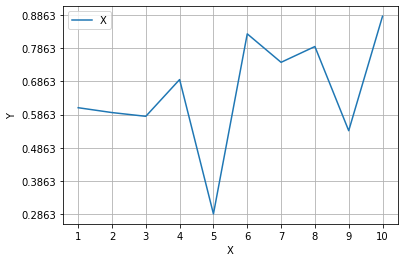

In [ ]:
plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+0.1, 0.1))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend("X")
plt.grid()
plt.show()

In [ ]:
y = np.linspace(1, 10, 10)
x = np.random.rand(10)
x, y

(array([0.12825639, 0.01990969, 0.40513949, 0.04846343, 0.46286667,
        0.26308042, 0.76830965, 0.72199911, 0.73799468, 0.8418468 ]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

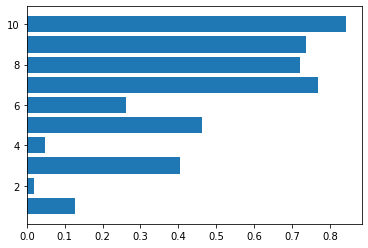

In [ ]:
plt.barh(y, x)
plt.savefig("test.png", dpi=200, facecolor="red")#이미지파일 저장